## Import the necessary Libararies and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DSC 630/als_data.csv")
data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
# Remove ID column
data = data.drop(['ID','SubjectID'],axis=1)

In [4]:
# Check the structure of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.SG

The dataset contains 98 columns.  We'll adopt randomforest regression for feature selection.  From the literature, ALS condition is measured by ALSFRS_slope.

In [5]:
# import random forest libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [6]:
# Create the features

X = data.drop('ALSFRS_slope',axis=1)
y = data['ALSFRS_slope']

In [7]:
# Create a randomforest regressor

clf = RandomForestRegressor(n_estimators=200,random_state=0,n_jobs=-1)

clf.fit(X,y)

# print the name of and gini importance of each feature

for feature in zip(X.columns,clf.feature_importances_):
  print(feature)

('Age_mean', 0.0037744688668357403)
('Albumin_max', 0.0019376217608390053)
('Albumin_median', 0.0018192338239591958)
('Albumin_min', 0.0017183887255982123)
('Albumin_range', 0.005264135674859937)
('ALSFRS_Total_max', 0.0020532032092087688)
('ALSFRS_Total_median', 0.010089015881257025)
('ALSFRS_Total_min', 0.0033366382923384922)
('ALSFRS_Total_range', 0.6939651837415662)
('ALT.SGPT._max', 0.00295319904925661)
('ALT.SGPT._median', 0.0036660291425108862)
('ALT.SGPT._min', 0.003139578367509986)
('ALT.SGPT._range', 0.004751087090298099)
('AST.SGOT._max', 0.002432724048575397)
('AST.SGOT._median', 0.0032721341619729536)
('AST.SGOT._min', 0.002124354823806451)
('AST.SGOT._range', 0.0037533735963918334)
('Bicarbonate_max', 0.0021510402231933907)
('Bicarbonate_median', 0.0027435407955361552)
('Bicarbonate_min', 0.0021067745505395446)
('Bicarbonate_range', 0.0047492099309716556)
('Blood.Urea.Nitrogen..BUN._max', 0.0026961113635823705)
('Blood.Urea.Nitrogen..BUN._median', 0.0032930035472456976)
(

In [8]:
# Identify and select the most important features

sfm = SelectFromModel(clf,threshold=0.0035)
sfm.fit(X,y)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                                random_state=0),
                threshold=0.0035)

In [9]:
for feature_list in sfm.get_support(indices=True):
  feat_names = X.columns[feature_list]
  print(feat_names)

Age_mean
Albumin_range
ALSFRS_Total_median
ALSFRS_Total_range
ALT.SGPT._median
ALT.SGPT._range
AST.SGOT._range
Bicarbonate_range
Blood.Urea.Nitrogen..BUN._range
bp_diastolic_range
bp_systolic_range
Calcium_max
Calcium_median
Calcium_min
Calcium_range
Chloride_range
Creatinine_max
Glucose_median
Glucose_min
Glucose_range
hands_range
Hematocrit_max
Hemoglobin_range
leg_median
leg_range
mouth_range
onset_delta_mean
Potassium_range
pulse_median
pulse_range
respiratory_range
Sodium_range
trunk_median
trunk_range


We have reduced 98 features to 33 most important features.  Clustering will be done with these features.

## Create a dataframe of important features

In [10]:
df = data[['Age_mean','Albumin_range','ALSFRS_Total_median','ALSFRS_Total_range','ALT.SGPT._median','ALT.SGPT._range','AST.SGOT._range',
      'Bicarbonate_range','Blood.Urea.Nitrogen..BUN._range','bp_diastolic_range','bp_systolic_range','Calcium_max','Calcium_median',
      'Calcium_min','Calcium_range','Chloride_range','Creatinine_max','Glucose_median','Glucose_min','Glucose_range','hands_range','Hematocrit_max',
      'Hemoglobin_range','leg_median','leg_range','mouth_range','onset_delta_mean','Potassium_range','pulse_median','pulse_range','respiratory_range',
      'Sodium_range','trunk_median','trunk_range']]

In [11]:
df.head()

,Age_mean,Albumin_range,ALSFRS_Total_median,ALSFRS_Total_range,ALT.SGPT._median,ALT.SGPT._range,AST.SGOT._range,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_range,...,leg_range,mouth_range,onset_delta_mean,Potassium_range,pulse_median,pulse_range,respiratory_range,Sodium_range,trunk_median,trunk_range
0,65,0.066202,28.0,0.021164,22.0,0.020906,0.027875,0.017422,0.005089,0.055556,...,0.010582,0.013228,-1023,0.001742,68.0,0.047619,0.002646,0.017422,7.0,0.002646
1,48,0.010453,33.0,0.028725,13.0,0.029617,0.029617,0.012195,0.007633,0.028725,...,0.008977,0.008977,-341,0.001916,76.0,0.046679,0.001795,0.010453,7.0,0.005386
2,38,0.008929,14.0,0.025000,20.0,0.019643,0.010714,0.019643,0.003260,0.050000,...,0.003571,0.010714,-1181,0.000357,73.0,0.039286,0.000000,0.008929,0.0,0.008929
3,63,0.012111,29.0,0.014963,60.0,0.052369,0.032419,0.007481,0.003642,0.049875,...,0.004988,0.000000,-365,0.000748,72.0,0.039900,0.000000,0.012469,5.0,0.004988
4,63,0.008292,27.5,0.020374,26.5,0.026534,0.024876,0.014925,0.002422,0.053068,...,0.003396,0.000000,-1768,0.001824,96.0,0.044776,0.001698,0.008292,4.0,0.008489


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age_mean                         2223 non-null   int64  
 1   Albumin_range                    2223 non-null   float64
 2   ALSFRS_Total_median              2223 non-null   float64
 3   ALSFRS_Total_range               2223 non-null   float64
 4   ALT.SGPT._median                 2223 non-null   float64
 5   ALT.SGPT._range                  2223 non-null   float64
 6   AST.SGOT._range                  2223 non-null   float64
 7   Bicarbonate_range                2223 non-null   float64
 8   Blood.Urea.Nitrogen..BUN._range  2223 non-null   float64
 9   bp_diastolic_range               2223 non-null   float64
 10  bp_systolic_range                2223 non-null   float64
 11  Calcium_max                      2223 non-null   float64
 12  Calcium_median      

## Apply a Standard Scalar to the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn import metrics

In [14]:
cols = df.columns
ms = MinMaxScaler()
df = ms.fit_transform(df)

In [15]:
df = pd.DataFrame(df,columns=[cols])
df.head()

,Age_mean,Albumin_range,ALSFRS_Total_median,ALSFRS_Total_range,ALT.SGPT._median,ALT.SGPT._range,AST.SGOT._range,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_range,...,leg_range,mouth_range,onset_delta_mean,Potassium_range,pulse_median,pulse_range,respiratory_range,Sodium_range,trunk_median,trunk_range
0,0.746032,0.271429,0.680000,0.179894,0.075676,0.007629,0.014543,0.081301,0.073171,0.077778,...,0.251852,0.359788,0.675475,0.017656,0.276923,0.085314,0.104056,0.121951,0.875,0.062963
1,0.476190,0.042857,0.813333,0.244165,0.027027,0.011288,0.015452,0.056911,0.109756,0.040215,...,0.213645,0.244165,0.895263,0.019421,0.400000,0.083412,0.070616,0.073171,0.875,0.128187
2,0.317460,0.036607,0.306667,0.212500,0.064865,0.007098,0.005590,0.091667,0.046875,0.070000,...,0.085000,0.291429,0.624557,0.003619,0.353846,0.068464,0.000000,0.062500,0.000,0.212500
3,0.714286,0.049656,0.706667,0.127182,0.281081,0.020846,0.016914,0.034913,0.052369,0.069825,...,0.118703,0.000000,0.887528,0.007582,0.338462,0.069707,0.000000,0.087282,0.625,0.118703
4,0.714286,0.033997,0.666667,0.173175,0.100000,0.009993,0.012979,0.069652,0.034826,0.074295,...,0.080815,0.000000,0.435385,0.018487,0.707692,0.079566,0.066780,0.058043,0.500,0.202037


### Create a Plot the cluster Silhouette score versu sthe number of clusters in a K-means cluster

In [16]:
krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n,random_state=10)
  cluster_assignments = model.fit_predict(df)
  silhoutte_avg = metrics.silhouette_score(df,cluster_assignments)
  avg_silhouettes.append(silhoutte_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

### Plot the result of krange against avg_silhouette

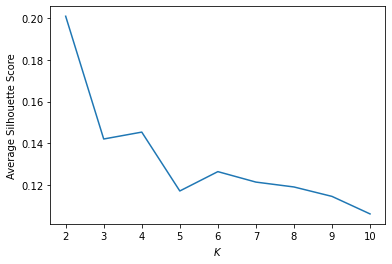

In [17]:
plt.plot(krange,avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

The above plot seem to suggest k = 2. since the highest average silhouette score was at its highest (0.20) when k =2.


## Fit a K-means model to the data with k = 2

In [19]:
from sklearn.cluster import KMeans
km_2 = KMeans(n_clusters=2,random_state=42)
km_2.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=2, random_state=42)

In [27]:
df['cluster'] = km_2.labels_
km2 = pd.DataFrame(km_2.labels_,columns=['cluster'])
km2.head()

,cluster
0,0
1,0
2,1
3,0
4,1


## Fitting a PCA

In [24]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2).fit(df)
pca_trans = pca.transform(df)
pca_trans_df = pd.DataFrame(pca_trans,columns=['pca1','pca2'])

# concatenate km2 with pca_trans_df

km2 = pd.concat([km2,pca_trans_df],axis=1)
km2.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,cluster,pca1,pca2
0,0,-0.560863,0.162707
1,0,-0.646207,0.207739
2,1,0.820034,-0.100761
3,0,-0.382765,-0.217366
4,1,0.576030,-0.288326


## Plot the PCA

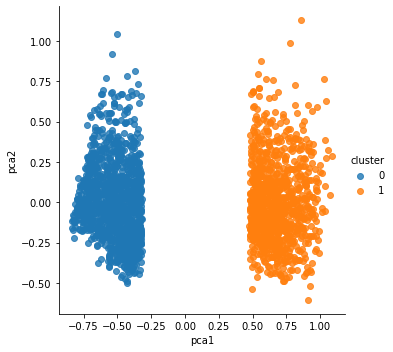

In [31]:
fig = sns.lmplot(x='pca1',y='pca2',data=km2,hue='cluster',fit_reg=False)
plt.show()

##  Summary of Results

This project utilized the Silhouette chart to select the number of optimal clusters in our dataframe.  The dataframe consists of 101 features but 30 of the features were selected based on random forest regressor selection method with a threshold of 0.003.  

Using the PCA to compress the dimension of the data, 2 clear groups were observed from the PCA visualization.